### Model uji Coba

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

In [22]:
def map_sentiment(sentiment):
    if sentiment == 1:
        return 'positif'
    elif sentiment == 0:
        return 'netral'
    else:
        return 'negatif'

In [23]:
def prepare_datasets(corpus, labels, test_data_proportion=0.3, random_state=42):
    train_X, test_X, train_Y, test_Y = train_test_split(corpus, labels,
                                                        test_size=test_data_proportion,
                                                        random_state=random_state)
    return train_X, test_X, train_Y, test_Y

In [24]:
def tfidf_extractor(corpus, ngram_range=(1,2)):
    vectorizer = TfidfVectorizer(min_df=1,
                                norm='l2',
                                smooth_idf=True,
                                use_idf=True,
                                ngram_range=ngram_range)
    features = vectorizer.fit_transform(corpus)
    return vectorizer, features

In [25]:
df = pd.read_csv('sentiment_500.csv')
df['sentimen'] = df['sentimen'].map(map_sentiment)
df.head(10)

,content,sentimen
0,anwar usman mengaku terbebani diberhentikan ja...,positif
1,calon wakil presiden koalisi indonesia maju ki...,positif
2,calon presiden nomor urut 2 prabowo subianto b...,positif
3,calon presiden nomor urut 2 prabowo subianto m...,positif
4,calon presiden nomor urut 2 prabowo subianto m...,positif
5,calon presiden nomor urut 3 ganjar pranowo ber...,positif
6,calon presiden nomor urut 1 anies baswedan tip...,positif
7,calon presiden nomor urut 1 anies baswedan ber...,positif
8,calon presiden nomor urut 1 anies baswedan men...,positif
9,calon presiden nomor urut 1 anies baswedan nua...,positif


In [26]:
# Split data
x_train, x_test, y_train, y_test = prepare_datasets(df['content'], df['sentimen'], test_data_proportion=0.3)

In [27]:
# Convert text labels to numerical labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Ensure the lengths match after splitting
y_train_encoded = y_train_encoded[:len(x_train)]
y_test_encoded = y_test_encoded[:len(x_test)]

In [28]:
# TF-IDF Vectorization
tfidf_vectorizer, tfidf_train_features = tfidf_extractor(x_train)
tfidf_test_features = tfidf_vectorizer.transform(x_test)

In [29]:
print("Shape of tfidf_train_features:", tfidf_train_features.shape)
print("Length of y_train_encoded:", len(y_train_encoded))

Shape of tfidf_train_features: (350, 37551)
Length of y_train_encoded: 350


In [30]:
print("Shape of tfidf_test_features:", tfidf_test_features.shape)
print("Length of y_test_encoded:", len(y_test_encoded))

Shape of tfidf_test_features: (150, 37551)
Length of y_test_encoded: 150


## Naiye Bayes

In [31]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [32]:
# Train Naive Bayes model
nb_classifier = MultinomialNB()
nb_classifier.fit(tfidf_train_features, y_train_encoded)

MultinomialNB()

In [33]:
# Predictions
nb_pred = nb_classifier.predict(tfidf_test_features)

# Accuracy
nb_accuracy = accuracy_score(y_test_encoded, nb_pred)
print("Naive Bayes Accuracy:", nb_accuracy)

Naive Bayes Accuracy: 0.6133333333333333


In [34]:
# Classification Report
nb_report = classification_report(y_test_encoded, nb_pred, target_names=label_encoder.classes_)
print("Naive Bayes Classification Report:\n", nb_report)

Naive Bayes Classification Report:
               precision    recall  f1-score   support

     negatif       0.74      0.33      0.45        43
      netral       0.54      0.89      0.68        57
     positif       0.73      0.54      0.62        50

    accuracy                           0.61       150
   macro avg       0.67      0.59      0.58       150
weighted avg       0.66      0.61      0.59       150



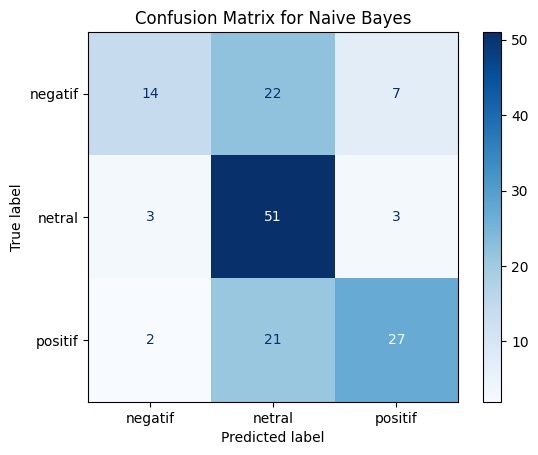

In [35]:
# Plot confusion matrix
nb_confusion_matrix = confusion_matrix(y_test_encoded, nb_pred)
nb_display = ConfusionMatrixDisplay(confusion_matrix=nb_confusion_matrix, display_labels=label_encoder.classes_)
nb_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Naive Bayes')
plt.show()

### SVM

In [36]:
from sklearn.svm import SVC

In [37]:
# Train SVM model
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(tfidf_train_features, y_train_encoded)


SVC(kernel='linear')

In [38]:
# Predictions
svm_pred = svm_classifier.predict(tfidf_test_features)

# Accuracy
svm_accuracy = accuracy_score(y_test_encoded, svm_pred)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.7066666666666667


In [39]:
# Classification Report
svm_report = classification_report(y_test_encoded, svm_pred, target_names=label_encoder.classes_)
print("SVM Classification Report:\n", svm_report)

SVM Classification Report:
               precision    recall  f1-score   support

     negatif       0.65      0.65      0.65        43
      netral       0.75      0.84      0.79        57
     positif       0.70      0.60      0.65        50

    accuracy                           0.71       150
   macro avg       0.70      0.70      0.70       150
weighted avg       0.70      0.71      0.70       150



<Figure size 800x600 with 0 Axes>

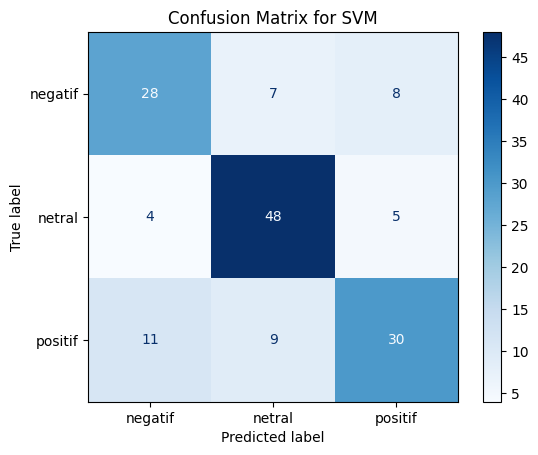

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay

# Compute confusion matrix for SVM
svm_confusion_matrix = confusion_matrix(y_test_encoded, svm_pred)

# Plot confusion matrix for SVM
plt.figure(figsize=(8, 6))
svm_disp = ConfusionMatrixDisplay(confusion_matrix=svm_confusion_matrix, display_labels=label_encoder.classes_)
svm_disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for SVM')
plt.show()